In [ ]:
'''
Contours :
    - It is simply as a curve joining all the continuous points (along the boundary), having same color or intensity
    - Using contour detection, we can detect the borders of objects, and localize them easily in an image
    - The contours are a useful tool for shape analysis and object detection and recognition
    - For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
    -

In [ ]:
'''
Application of Contours in COmputer Vision
    - Motion Detection
    - Unattended object detection
    - Background / Foreground Segmentation:

In [ ]:
'''
Useful functions Contours
    - findContours()
    - drawContours()

In [ ]:
'''
findContours() Parameters
    - binary_image(Thresholding)
    - mode
    - method

In [ ]:
'''
drawContours() Parameters
    - Original Image
    - contours
    - contourIdx
    - color
    - Index
    - lineType

In [ ]:
'''
Steps for Detecting and Drawing Contours
    1. Read the Image and convert it to Grayscale Format
    2. Apply Binary Thresholding
    3. Find the Contours
    4. Draw Contours on the Original RGB Image.

Text(0.5, 1.0, 'Draw Contours')

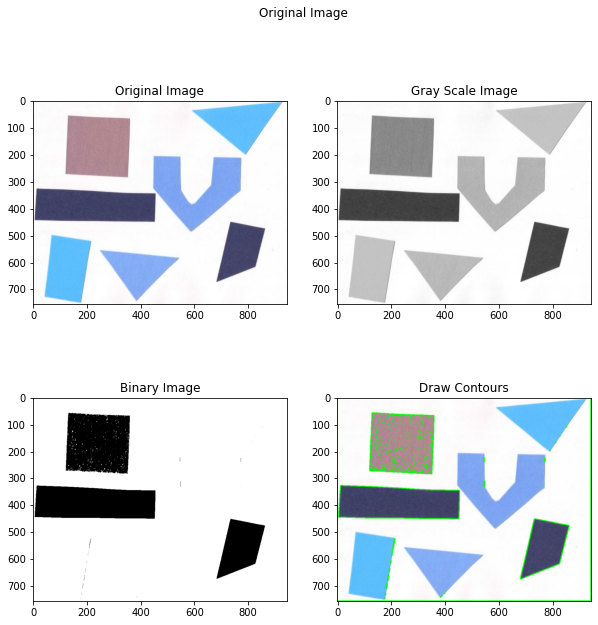

In [11]:
import cv2

image = cv2.imread("img/1.jpg")

# convert the image to grayscale format
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                  
image_copy = image.copy()

# draw contours on the original image
cv2.drawContours(image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
               
# see the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2,figsize=(10,10))

fig.suptitle('Original Image')
ax[0,0].imshow(image,cmap="gray")
ax[0,0].set_title("Original Image")

ax[0,1].imshow(img_gray,cmap="gray")
ax[0,1].set_title("Gray Scale Image")

ax[1,0].imshow(thresh,cmap="gray")
ax[1,0].set_title("Binary Image")

ax[1,1].imshow(image_copy,cmap="gray")
ax[1,1].set_title("Draw Contours")

336


Text(0.5, 1.0, 'Original countour  num_pts:336')

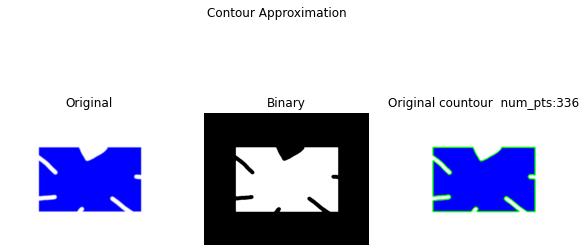

In [1]:
import cv2
import imutils

# load the image and display it
image = cv2.imread("img/2.jpg")

# convert the image to grayscale and threshold it
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray, 200, 255,cv2.THRESH_BINARY_INV)[1]

# find the largest contour in the threshold image

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

print(len(c))

output = image.copy()
cv2.drawContours(output, [c], -1, (0, 255, 0), 3)

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(10,5))
fig.suptitle('Contour Approximation')
ax1.imshow(image)
ax1.axis("off")
ax1.set_title("Original")

ax2.imshow(thresh,cmap="gray")
ax2.axis("off")
ax2.set_title("Binary")

ax3.imshow(output,cmap="gray")
ax3.axis("off")
ax3.set_title("Original countour  num_pts:{0}".format(len(c)))